## Kaggle Digit Recognizer using Stochastic Gradient Descent

## 1. Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

raw_data = open("train.csv",'rt')
data = np.loadtxt(raw_data, delimiter = ',', skiprows =1)

data.shape[0]

42000

In [3]:
np.random.shuffle(data)
np.random.shuffle(data)

## Splitting data
    - training data : 60%
    - test data: 20%
    - cross validation data: 20%
    

0.873928571429 0.883333333333


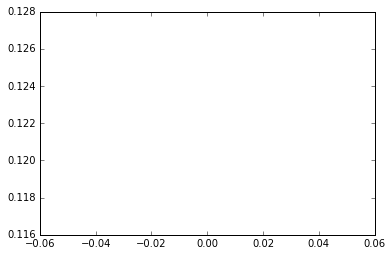

Done


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

pca = PCA(n_components=25)

def normalize(sigma2, mean2, X):
    X = (X-mean2)/sigma2
    return X

def add_x0(X):
    return np.column_stack((np.zeros(X.shape[0],), X))

J1=[];
J2=[];
# variance = (np.var(data[:,1:], axis =0)>1000)
# X_train = X_train1[:,variance]
raw_data = open("test.csv",'rt')
test_X = np.loadtxt(raw_data, delimiter = ',', skiprows =1)
# sigma = np.std(X_train, axis =0)
# mean = np.mean(X_train, axis =0)
# sigma1 = np.std(X_train1, axis =0)
# mean1 = np.mean(X_train1, axis =0)
X_test1 = data[33600:, 1:]

# y_cv = data[25200:33600, 0]

y_test = data[33600:, 0]
for i in range(34000,34001,1000):
    y_train = data[:, 0]
    X_train1 = data[:,1:]
    pca.fit(X_train1)
    X_train2 = pca.transform(X_train1)
#     poly = PolynomialFeatures(2, include_bias=False)
#     X_train2 = poly.fit_transform(X_train2)
    # X_train1 = normalize(sigma1, mean1 , X_train1)      #without removing columns with less variance
    # X_train = normalize(sigma , mean , X_train)

    # print(X_train.shape)
    # print(np.var(X_train, axis =0))

    # X_cv1 = data[25200:33600, 1:]
    # X_cv = X_cv1[:,variance]
    # X_cv2 = X_cv
    # X_cv = normalize(sigma , mean , X_cv)
    # X_cv1 = normalize(sigma1 , mean1 , X_cv1)

    # X_test = X_test1[:,variance]
    # X_test = normalize(sigma , mean , X_test)
    # X_test1 = normalize(sigma1 , mean1 , X_test1)
    X_test2 = pca.transform(X_test1)
#     X_test2  = poly.fit_transform(X_test2)
    test_X = pca.transform(test_X)
#     test_X = poly.fit_transform(test_X)
    #Adding x0
    # X_train1= add_x0(X_train1)
    # X_cv1= add_x0(X_cv1)
    # X_cv= add_x0(X_cv)
    # X_test1 = add_x0(X_test1)
    ###########################
    regr = linear_model.LogisticRegression(solver='lbfgs')

    regr.fit(X_train2, y_train)
    score1 = regr.score(X_train2, y_train)
    score2 = regr.score(X_test2, y_test)
    theta = np.column_stack((regr.intercept_, regr.coef_))

    np.savetxt("del.txt", theta.T, delimiter =',', newline='\n')
    test_Y = regr.predict(test_X)
    image_id = np.arange(1,test_Y.shape[0]+1)
    test_Y = np.column_stack((image_id, test_Y))
    np.savetxt('prediction.csv', test_Y, header='ImageId,Label', delimiter=',', fmt='%i',newline='\n', comments='')
    print(score1, score2)
    J1.append(1 - score1)
    J2.append(1 - score2)

plt.plot(J1,'b-')
plt.plot(J2,'r-')
plt.show()

   


# print(X_train.shape, X_cv.shape, X_test.shape)
# print(y_train.shape, y_cv.shape, y_test.shape)



#Adding polynomial features
# poly = PolynomialFeatures(1, include_bias=False)
# X_train = poly.fit_transform(X_train)
# X_test = poly.fit_transform(X_test)
# X_train= add_x0(X_train)
# X_test = add_x0(X_test)
print("Done")

In [3]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

raw_data2 = open("prediction.csv",'rt')
prediction = np.loadtxt(raw_data2, delimiter = ',', skiprows =1)
image_id = np.arange(1,prediction.shape[0]+1)
prediction = np.column_stack((image_id, prediction))

np.savetxt('prediction.csv', prediction, header='ImageId,Label', delimiter=',', fmt='%i',newline='\n', comments='')



# Stochastic

In [ ]:
theta = np.zeros((X_train.shape[1],10)) 
def cost(X, y, theta):
    m = X.shape[0]
    J = (1/(2*m))*np.sum(np.square(np.dot(X,theta) -y))

    return J;

def hypothesis(x_tmp, theta1):
    h = np.dot(np.transpose(x_tmp), theta1)
    h_temp = h[0,0]
    h_temp = 1/(1+np.exp(-h_temp))
#     print(h_temp)
    return h_temp

def stochastic_gradientDescent(X, y, theta):
    m = X.shape[0]
    alpha = 0.0001
    for k in range(0,10):
        print(k)
        for i in range(1,10):
            for j in range(1,m):
                x_tmp = X[i, :]
                x_tmp = x_tmp.reshape(x_tmp.shape[0], 1)
                y_tmp = (y[i] == k).astype(np.float64)
                theta1 = theta[:,k].reshape(theta[:,k].shape[0],1)
                theta[:,k] = (theta1 -(np.dot((alpha*x_tmp),(hypothesis(x_tmp, theta1) - y_tmp)))).reshape(theta1.shape[0], ) 
#                 print("theta=",theta[:,k])
#             print(cost(x_tmp, y_tmp, theta[:,k]))

stochastic_gradientDescent(X_train, y_train, theta) 
print(theta)
np.savetxt("del.txt", theta, delimiter =',', newline='\n')

# Sklearn SGD

In [ ]:
import  numpy as np
from sklearn import linear_model

clf = linear_model.SGDClassifier(alpha = 0.0001)
clf.fit(X_train, y_train)

theta = np.zeros((X_train2.shape[1]+1,10)) 

print(clf.score(X_test, y_test))

theta = np.column_stack((clf.intercept_, clf.coef_))
# print(theta.T)
print(clf.get_params(deep = True))

np.savetxt("del.txt", theta.T, delimiter =',', newline='\n')


# BFGS

In [221]:
from sklearn import linear_model

regr = linear_model.LogisticRegression(solver='lbfgs')

regr.fit(X_train2, y_train)
score1 = regr.score(X_train2, y_train)
score = regr.score(X_test2, y_test)
print(score1, score)

0.892291666667 0.888095238095
